Loading Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.model_selection import cross_val_score 

C:\Users\Rohit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%matplotlib inline
plt.style.use('seaborn')

In [4]:
cd D:\STUDY\SEM-4\ML\Assignment-1

D:\STUDY\SEM-4\ML\Assignment-1


In [5]:
data = pd.read_csv('student-mat.csv',sep = ';')
df = data
ydata = (data['G3']>11.0).astype(int)
y_df = pd.DataFrame(ydata)
data = data.drop(['G1','G2','G3'], axis = 1)
#data.dtypes
obj_df = data.select_dtypes(include=['object']).copy()
#df_3 = pd.get_dummies(obj_df,columns=['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'],drop_first = True)
#data = data.drop(['school','sex', 'address','famsize','Pstatus','dep','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'], axis=1)
df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
df_5 = data.drop(obj_df.columns, axis = 1)
xdata = pd.concat([df_5,df_4],axis = 1)
#xdata = pd.concat([data,df_3],axis = 1)

Train and Test Data Split


In [6]:
X_train, X_test, y_train, y_test = train_test_split( xdata , ydata , test_size=0.33, random_state=42)

Vizualising Target Variable Distribution

In [8]:
import seaborn as sns

In [9]:
sns.lmplot( x="age", y="traveltime",data = xdata,fit_reg=False, hue=ydata, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

ValueError: setting an array element with a sequence

SVM

In [10]:
from sklearn.svm import SVC  
#svclassifier = SVC(kernel='poly')  
#svclassifier.fit(X_train, y_train)  

In [11]:
y_pred = svclassifier.predict(X_test)
y_pred

NameError: name 'svclassifier' is not defined

In [12]:
from sklearn.metrics import classification_report, confusion_matrix  

In [161]:
confusion_matrix(y_test,y_pred).flatten().sum()
#print(classification_report(y_test,y_pred))

131

Optimum number of variables - SVM

In [13]:
def featurebuild(data,n):
    df = []    
    if n < data.shape[1]:
        df = data.iloc[:,:n+1]
    elif (n >= data.shape[1]):
        df = data
    if len(df.dtypes[df.dtypes == 'object']) != 0:
        obj_df = df.select_dtypes(include=['object']).copy()
        df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
        df_5 = df.drop(obj_df.columns, axis = 1)
        df_6 = pd.concat([df_5,df_4],axis = 1)
    return df_6

In [ ]:
scores = np.zeros((30,6))
kernel = ['linear','rbf','poly']
for j in range(30):
    dat = featurebuild(data,j)
    X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split( dat , ydata , test_size=0.33, random_state=42)
    for i in range(len(kernel)):
        clf = svm.SVC(kernel=kernel[i], C=100)
        score = cross_val_score(clf, dat, ydata, cv=5)
        svclassifier = SVC(kernel=kernel[i])  
        svclassifier.fit(X_svm_train, y_svm_train)
        y_train_pred = svclassifier.predict(X_svm_train)
        y_test_pred = svclassifier.predict(X_svm_test)
        train_acc = (confusion_matrix(y_svm_train,y_train_pred).diagonal()[0]+confusion_matrix(y_svm_train,y_train_pred).diagonal()[1])/(confusion_matrix(y_svm_train,y_train_pred).flatten().sum())
        test_acc = (confusion_matrix(y_svm_test,y_test_pred).diagonal()[0]+confusion_matrix(y_svm_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_svm_test,y_test_pred).flatten().sum())
        scores[j][i] = train_acc
        scores[j][i+3] = test_acc
#scores

In [286]:
ass= np.matrix(scores)

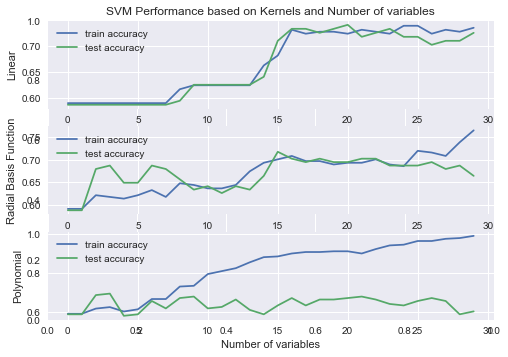

In [315]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
xdist = np.arange(0,30,1)
ax1.plot(xdist,ass[:,0],label = 'train accuracy')
ax1.plot(xdist,ass[:,3],label = 'test accuracy')
ax1.legend(loc='upper left')
ax1.set_ylabel('Linear')
ax2.plot(xdist,ass[:,1],label = 'train accuracy')
ax2.plot(xdist,ass[:,4],label = 'test accuracy')
ax2.legend(loc='upper left')
ax2.set_ylabel('Radial Basis Function')
ax3.plot(xdist,ass[:,2],label = 'train accuracy')
ax3.plot(xdist,ass[:,5],label = 'test accuracy')
ax3.legend(loc='upper left')
ax3.set_ylabel('Polynomial')
ax3.set_xlabel('Number of variables')
ax.set_title('SVM Performance based on Kernels and Number of variables')
plt.show()

Train dataset size and performance

In [329]:
box = np.zeros((5,3))
a = [10,25,50,75,100]
for i in range(len(a)):
    X_train_cut = X_train[:int((X_train.shape[0])*a[i]/100)]
    y_train_cut = y_train[:int((y_train.shape[0])*a[i]/100)]
    svclassifier = SVC(kernel='linear') 
    svclassifier.fit(X_train_cut,y_train_cut)
    y_cut_pred = svclassifier.predict(X_train_cut)
    y_test_pred = svclassifier.predict(X_test)
    train_acc = (confusion_matrix(y_train_cut,y_cut_pred).diagonal()[0]+confusion_matrix(y_train_cut,y_cut_pred).diagonal()[1])/(confusion_matrix(y_train_cut,y_cut_pred).flatten().sum())
    test_acc = (confusion_matrix(y_test,y_test_pred).diagonal()[0]+confusion_matrix(y_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_test,y_test_pred).flatten().sum())
    box[i][0] = a[i]
    box[i][1] = train_acc
    box[i][2] = test_acc   

array([[ 10.        ,   0.88461538,   0.60305344],
       [ 25.        ,   0.84848485,   0.64885496],
       [ 50.        ,   0.77272727,   0.70992366],
       [ 75.        ,   0.78787879,   0.6870229 ],
       [100.        ,   0.73484848,   0.72519084]])

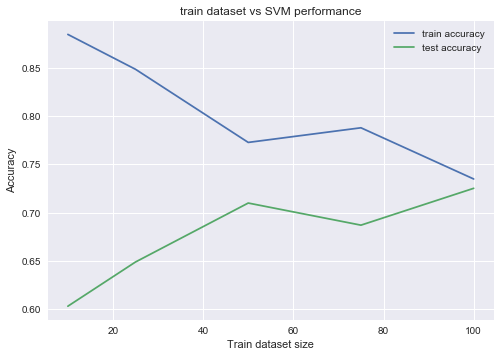

In [330]:
fig_2 =plt.figure()
ax = fig_2.add_subplot(111)
ax.plot(box[:,0],box[:,1],label = 'train accuracy')
ax.plot(box[:,0],box[:,2],label = 'test accuracy')
ax.legend(loc='upper right')
ax.set_title('train dataset vs SVM performance')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Train dataset size')
plt.show()

K Fold - Cross Validation with SVM

In [1]:
kernel = ['linear','rbf','poly','sigmoid']
result = np.ones(shape = (4,2)).reshape(-1,2)
for i in range(len(kernel)):
        clf = svm.SVC(kernel=kernel[i])
        score = cross_val_score(clf, xdata, ydata, cv=5)
        result[i][0] = score.mean()
        result[i][1] = score.std()
result

NameError: name 'np' is not defined

In [ ]:
fig_3 = plt.figure()
ax

In [108]:
result = pd.DataFrame(data = result,index= ['linear','rbf','poly','sigmoid'],columns = ['mean','std'])

In [109]:
result

,mean,std
linear,0.628848,0.108394
rbf,0.567006,0.051583
poly,0.567131,0.043933
sigmoid,0.589894,0.003785


Decision Trees

In [305]:
from sklearn.tree import DecisionTreeClassifier

In [326]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [325]:
clf_gini = clf(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

TypeError: 'DecisionTreeClassifier' object is not callable

In [321]:
from sklearn.tree import export_graphviz

In [313]:


graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

NameError: name 'Source' is not defined

In [286]:
print(confusion_matrix(y_test,asd))  
print(classification_report(y_test,asd))


[[44 33]
 [29 25]]
             precision    recall  f1-score   support

          0       0.60      0.57      0.59        77
          1       0.43      0.46      0.45        54

avg / total       0.53      0.53      0.53       131



In [407]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [449]:
def make_meshgrid(x, y,z, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    z_min, z_max = z.min() - 1, z.max() + 1
    xx, yy,zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),np.arange(z_min, z_max, h))
    return xx, yy, zz


def plot_contours(ax, clf, xx, yy, zz,**params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(),zz.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, zz, Z, **params)
    return out

TypeError: Input z must be a 2D array.

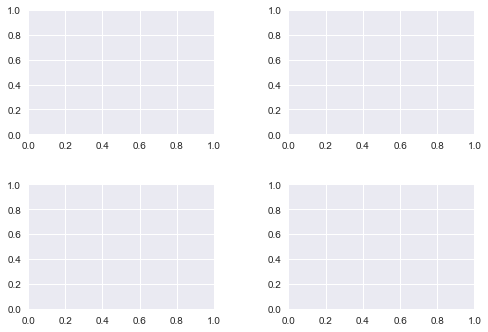

In [450]:
# Take the first three features. We could avoid this by using a three-dim dataset
X = data.iloc[:,:3]
y = y

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1, X2 = X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2]
xx, yy, zz = make_meshgrid(X0, X1, X2)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,zz,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, X2, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_zlim(zz.min(), zz.max())
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_zlabel('n')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_zticks(())
    ax.set_title(title)
    
plt.show()    